# (Example) Error Analysis on Feature Extraction

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import pandas as pd
import cv2
import os
import math
import random
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


import warnings
warnings.filterwarnings("ignore")

train_pair = pd.read_csv('.\COMP90086_2023_TLLdataset\\train.csv')

In [2]:
train_pair.head()

,left,right
0,aaa,osr
1,aaz,mqw
2,abh,cdx
3,abn,uzp
4,abq,bbd


# aaa.jpg

In [13]:
def random_select_img(path, img):
    random_img = random.choice(os.listdir(path))
    if random_img != img:
        return random_img
    else:
        return random_select_img(path, img)

correct_img = "osr.jpg"

right_img_20 = [correct_img]
# Randomly select other 19 right images
for j in range(19):
    right_img_20.append(random_select_img(".\COMP90086_2023_TLLdataset\\train\\right", correct_img))
    
right_img_20

['osr.jpg',
 'vcr.jpg',
 'vql.jpg',
 'ign.jpg',
 'nja.jpg',
 'trl.jpg',
 'pub.jpg',
 'okm.jpg',
 'uib.jpg',
 'prd.jpg',
 'nut.jpg',
 'ryx.jpg',
 'fnt.jpg',
 'rlp.jpg',
 'xze.jpg',
 'roc.jpg',
 'xso.jpg',
 'kvn.jpg',
 'bat.jpg',
 'ocn.jpg']

In [17]:
def extract_features(img_path):
    # Load the VGG16 model pretrained on ImageNet data
    model = VGG16(weights='imagenet', include_top=False)
    
    # Load the image and preprocess it for VGG16
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Extract features
    features = model.predict(img_array)

    # Flatten the features to convert it to 1D array
    return features.flatten()

left_features = np.load('vgg_train_left_all.npy')

right_features = []
for k in range(20):
    img_path = '.\COMP90086_2023_TLLdataset\\train\\right\\{}'.format(right_img_20[k])
    right_features.append(extract_features(img_path))

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

def cosine_similarity(vector1, vector2):
    dot_product = np.dot(vector1, vector2)
    norm_vector1 = np.linalg.norm(vector1)
    norm_vector2 = np.linalg.norm(vector2)
    similarity = dot_product / (norm_vector1 * norm_vector2)
    return similarity

for i in range(20):
    similarity_score = cosine_similarity(left_features[0], right_features[i])
    print("Cosine Similarity {}: {}".format(i, similarity_score))

Cosine Similarity 0: 0.2763003706932068
Cosine Similarity 1: 0.0562451109290123
Cosine Similarity 2: 0.17244316637516022
Cosine Similarity 3: 0.06439690291881561
Cosine Similarity 4: 0.10863979160785675
Cosine Similarity 5: 0.06759870052337646
Cosine Similarity 6: 0.2823314070701599
Cosine Similarity 7: 0.14950786530971527
Cosine Similarity 8: 0.24946372210979462
Cosine Similarity 9: 0.2707410156726837
Cosine Similarity 10: 0.12190480530261993
Cosine Similarity 11: 0.10680250823497772
Cosine Similarity 12: 0.21614238619804382
Cosine Similarity 13: 0.09692207723855972
Cosine Similarity 14: 0.18406005203723907
Cosine Similarity 15: 0.20575004816055298
Cosine Similarity 16: 0.24468998610973358
Cosine Similarity 17: 0.20394203066825867
Cosine Similarity 18: 0.10129398107528687
Cosine Similarity 19: 0.12056577950716019


In [21]:
# position 0: osr.jpg (correct right image)
# position 6: pub.jpg (false right image)
# position 9: prd.jpg (false right image)

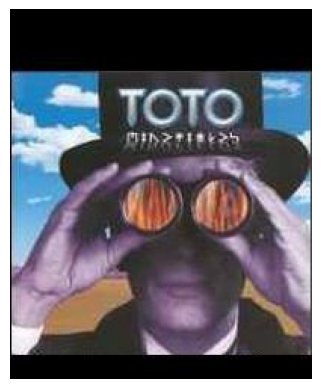

In [22]:
img_path = '.\COMP90086_2023_TLLdataset\\train\\left\\aaa.jpg'
img = mpimg.imread(img_path)
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

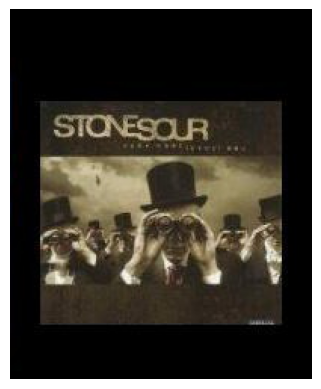

In [23]:
img_path = '.\COMP90086_2023_TLLdataset\\train\\right\\osr.jpg'
img = mpimg.imread(img_path)
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

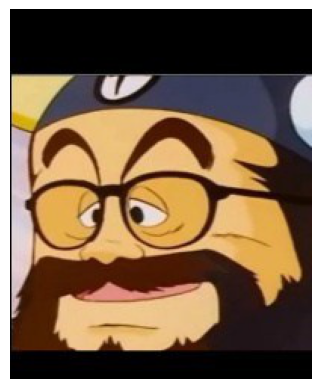

In [24]:
img_path = '.\COMP90086_2023_TLLdataset\\train\\right\\pub.jpg'
img = mpimg.imread(img_path)
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

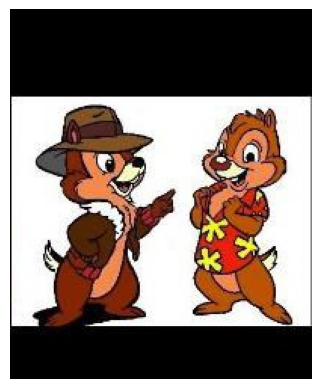

In [25]:
img_path = '.\COMP90086_2023_TLLdataset\\train\\right\\prd.jpg'
img = mpimg.imread(img_path)
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

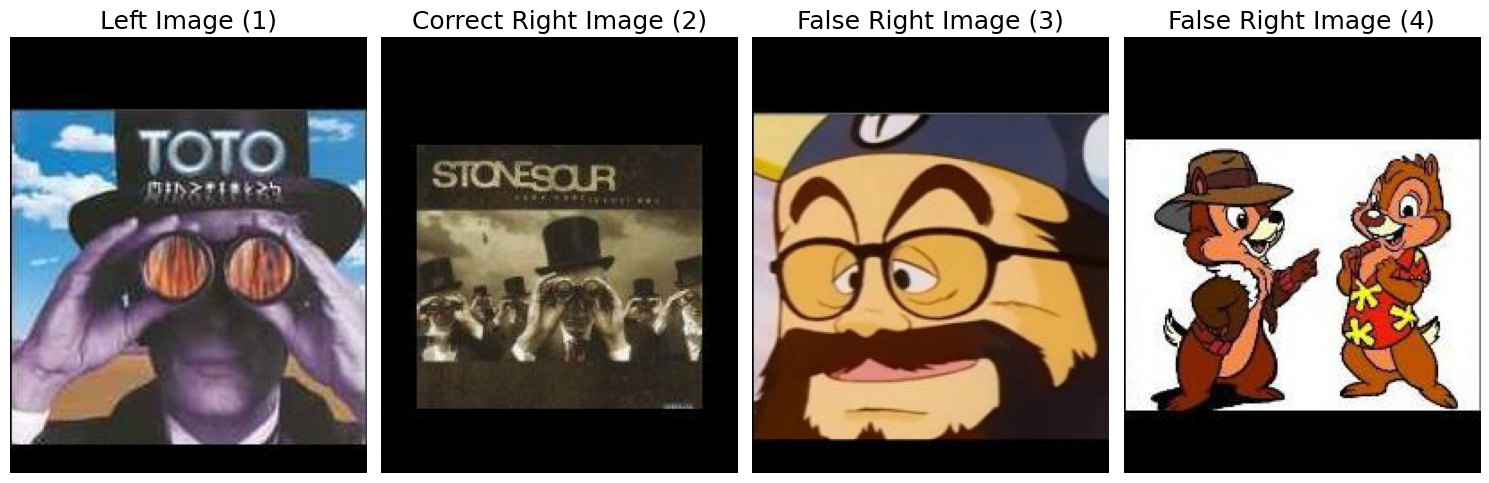

In [26]:
n = 4
imgs = ['aaa.jpg', 'osr.jpg', 'pub.jpg', 'prd.jpg']
for i in range(n): 
    # The figure has ceil(n/3) rows, 3 columns, and this plot is the (i+1) plot
    plt.subplot(math.ceil(n/4), 4, i+1)
    if i == 0:
        img = mpimg.imread('.\COMP90086_2023_TLLdataset\\train\\left\\{}'.format(imgs[i]))
        plt.title('Left Image ({})'.format(i+1), size=18)
    elif i == 1:
        img = mpimg.imread('.\COMP90086_2023_TLLdataset\\train\\right\\{}'.format(imgs[i]))
        plt.title('Correct Right Image ({})'.format(i+1), size=18)
    else:
        img = mpimg.imread('.\COMP90086_2023_TLLdataset\\train\\right\\{}'.format(imgs[i]))
        plt.title('False Right Image ({})'.format(i+1), size=18)
    imgplot = plt.imshow(img)
    plt.axis('off')
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(15, 7)
    
plt.tight_layout()
plt.savefig('example.png')